/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 0, Loss: 1.1102872621952784
Epoch 100, Loss: 0.4451396224718545
Epoch 200, Loss: 0.17256733424669424
Epoch 300, Loss: 0.09144089156491753
Epoch 400, Loss: 0.06313911536456523
Epoch 500, Loss: 0.04986597416736626
Epoch 600, Loss: 0.042416329263149595
Epoch 700, Loss: 0.037739501486892306
Epoch 800, Loss: 0.03457440344283693
Epoch 900, Loss: 0.03231469871839241
Precisión en entrenamiento: 0.9833
Precisión en prueba: 0.9667


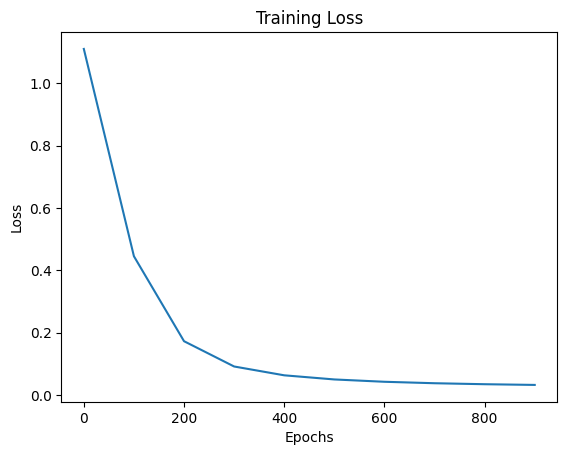

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

# 1. Preparación del entorno
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding para las etiquetas
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Implementación de la red neuronal
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # 3. Forward propagation
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    # 4. Función de pérdida
    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    # 5. Backward propagation
    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    # 6. Entrenamiento
    def train(self, X, y, epochs, learning_rate, batch_size):
        losses = []
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                y_pred = self.forward(X_batch)
                loss = self.cross_entropy_loss(y_batch, y_pred)
                self.backward(X_batch, y_batch, learning_rate)

            if epoch % 100 == 0:
                losses.append(loss)
                print(f"Epoch {epoch}, Loss: {loss}")
        return losses

    # 7. Evaluación
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == np.argmax(y, axis=1))

# Crear y entrenar el modelo
model = SimpleNeuralNetwork(input_size=4, hidden_size=10, output_size=3)
losses = model.train(X_train, y_train, epochs=250, learning_rate=0.1, batch_size=32)

# Evaluar el modelo
train_accuracy = model.accuracy(X_train, y_train)
test_accuracy = model.accuracy(X_test, y_test)

print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en prueba: {test_accuracy:.4f}")

# 8. Visualización
import matplotlib.pyplot as plt

plt.plot(range(0, 250, 100), losses)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()

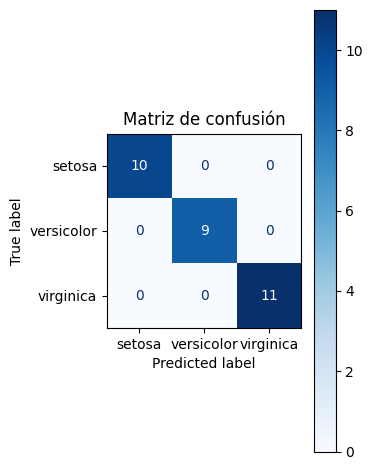

In [ ]:
# Matriz de confusión

plt.subplot(1, 2, 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
plt.title('Matriz de confusión')

plt.tight_layout()
plt.show()
